# IS362 Week Assignment

In this assignment we are asked to analyze a distribution of variables.  THe data come from the [UC Irvine data repostiory](https://archive.ics.uci.edu/ml/datasets/Auto+MPG).  We were asked to perfrom the following tasks:
1. Load the data file auto-mpg.data into pandas DataFrame
2. Review the data and provided data set description found here [Data Description](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/) the file is called *auto-mpg.names*
3. Name the columns of the frame based on the descrition of the columns found in the data description file.
4. Replace '?' with a an appropriate data type for 
5. Change the origin column values from 1,2,3  to USA, Asia, and Europe
6. Create a bar chart that shows the distribution for cylinders
7. Creata a scatterplot that shows the relationship between horsepower and weight.
8. Ask then answer a question about the distribution or the relationship between two (or more )variables in the dataset

## Loading the data creating columns
Since this is a *.data* file we can use the ```read_csv``` to read the file as woudl normally would.  We have included a fewnew imports one is to allow for the use of *seabourn* to create the plots that are required in point 7 & 8.  If you look at file in a spreadsheet program there are currently not headers to describe the column we can read the file and give the columns the headers at the same time.  We also need to realize that this file is not seperated by the ',' it is seperated by whitespace so the code o read and create a ussable dataframe is a little different.  The code to read the *.data* file is:

In [149]:
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

filepath_auto = 'auto-mpg.data'


col_names =['MPG','Cylinders','Displacement','Horsepower', 'Weight','Acceleration','Model Year', 'Origin', 'Car Name']

auto_frame = pd.read_csv(filepath_auto, delim_whitespace=True, names=col_names)


print(auto_frame.shape)

(398, 9)


The (389, 9) matches what is expected when the data is loaded into the frame. 

## Replace ? with a new value and convert to new data type

We next need replace the ? with a value that will allow data to be analyzed.  If we look at the types of the frame by using using:

In [150]:
print(auto_frame.dtypes)

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
Car Name         object
dtype: object


The data type for Horsepower is an object this shows that this is not the right type for the analysis we need to do.  First we need to replace the ? with a new value.  The value I have chosen is ***NaN***. I would have chosen a zero but this value may cause problems depending on the calcuation.  NaN will be skipped in most functions so it should not cause an error in calcuations like ```count()```.  To replace the ? we do the following:

In [151]:
#Replace ? with a number
auto_frame['Horsepower'] = auto_frame['Horsepower'].replace('?', np.NaN)

To change the column  to a usable data type we use:


In [152]:
#Convert the column to a numeric
auto_frame.Horsepower = auto_frame.Horsepower.astype(float)
print(auto_frame.dtypes)

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
Car Name         object
dtype: object


The data type has been changed to a float since the data description was given as continous and it is assumed to be like the others like MPG.

## Change the origin column values to USA, Europe, and Asia

The original values of these columns were 1,2,3.  We need to change these to USA, Asia, and Europe. To do this we use:

In [153]:
#Convert  1,2,3 to USA, Asia, and Europe
auto_frame['Origin'] = auto_frame['Origin'].map({1: 'USA', 2: 'Asia', 3: 'Europe'})

print(auto_frame.head(5))
print(auto_frame.tail(5))

    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year Origin                   Car Name  
0          70    USA  chevrolet chevelle malibu  
1          70    USA          buick skylark 320  
2          70    USA         plymouth satellite  
3          70    USA              amc rebel sst  
4          70    USA                ford torino  
      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0         

## Create a bar chart showing distribution

We want to look at the distribution of the cylinders. 

  Origin  Cylinders
0    USA          8
1    USA          8
2    USA          8
3    USA          8
4    USA          8
Origin  Cylinders
Asia    4             63
        5              3
        6              4
Europe  3              4
        4             69
        6              6
USA     4             72
        6             74
        8            103
Name: Origin, dtype: int64


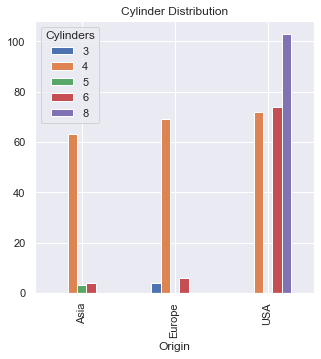

In [154]:
cyl_dist_frame = auto_frame[['Origin', 'Cylinders']]

print(cyl_dist_frame.head())

print(cyl_dist_frame.groupby(['Origin','Cylinders'])['Origin'].count())

cyl_plot = cyl_dist_frame.groupby(['Origin','Cylinders'])['Origin'].count().unstack().plot(
        kind='bar', title="Cylinder Distribution", figsize=(5,5))

This is the distribution of cylinders broken down by origin and cylinder.

##  Create a scatterplot.

The assignment asked for a scatterplot of the horsepower vs. Weight. In the assignment description the plots seem to have a trendline that is not included in a plain scatterplot.  In order to make the assignment look like the plots in the assignment an ```lmplot``` will be used to make a tendline and other items.  The plot is the following:


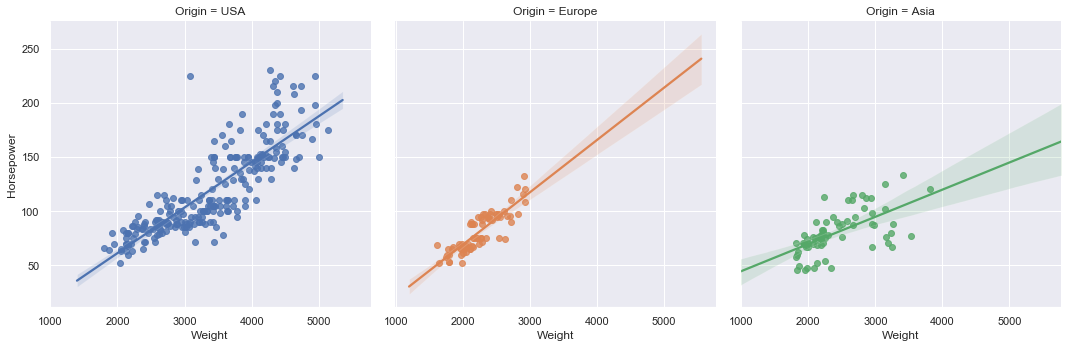

In [155]:
sns.set(color_codes=True)
wt_hp_frame = sns.lmplot(x='Weight',y='Horsepower', col='Origin', hue='Origin', data=auto_frame)

## What is the relation between weight and acceleration

In this chart it shows three variables: weight, acceleration, and horsepower. We can see that as there isn't a good way to draw a correlation between these.  

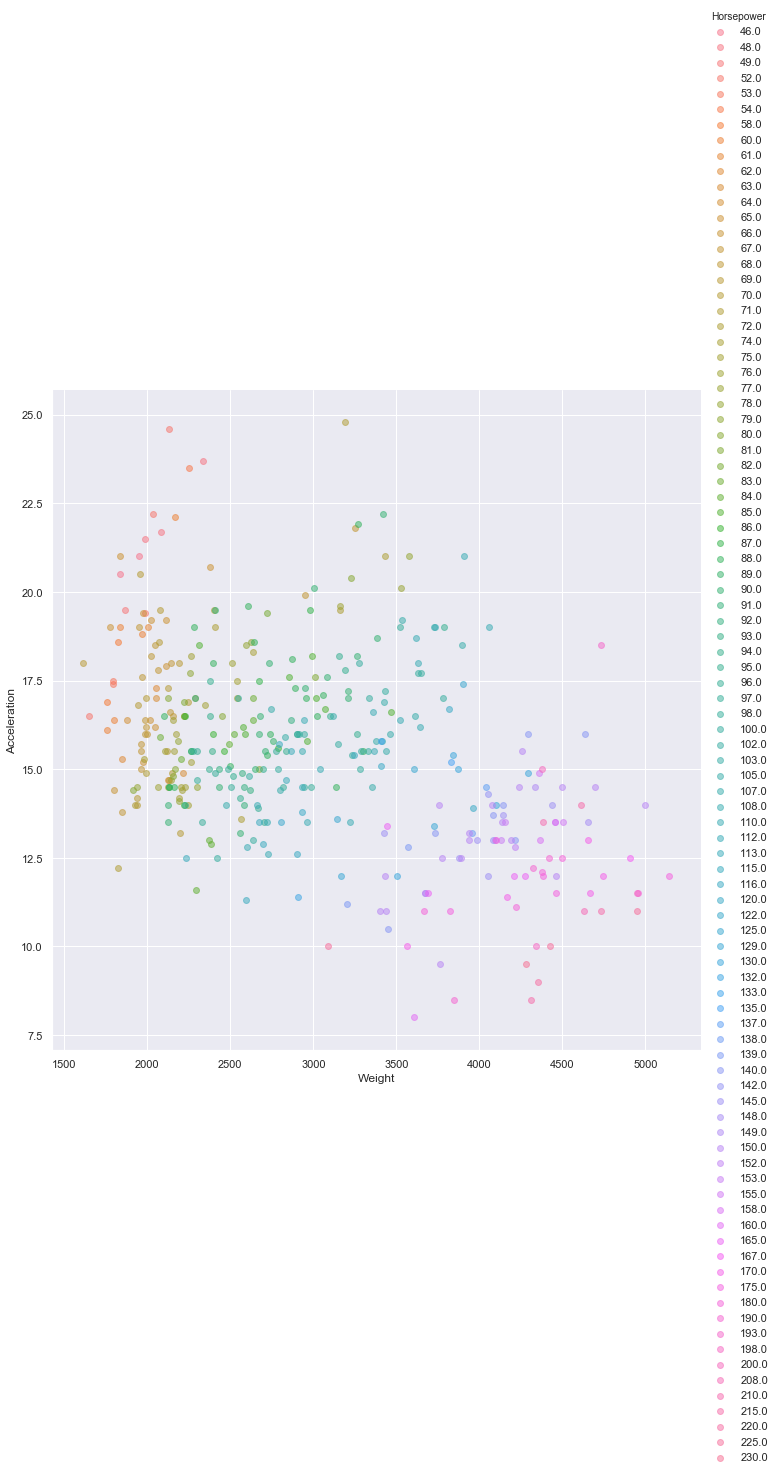

In [156]:
wt_hp_acc_ = sns.FacetGrid(auto_frame, hue='Horsepower', height=10, legend_out=True)
wt_hp_acc_.map(plt.scatter, 'Weight', 'Acceleration',alpha=.5).add_legend()